# 3 Метрики в задачах регрессии

In [55]:
import numpy as np
import scipy.stats as st
from scipy.optimize import minimize
import matplotlib.pyplot as plt

%matplotlib inline

Построим выборку из 500 точек на отрезке [0,100] и построим датасет, для которого $y = 0.5x+1+\varepsilon, \varepsilon \text{ ~ } Norm(0, \sqrt{0.2})$

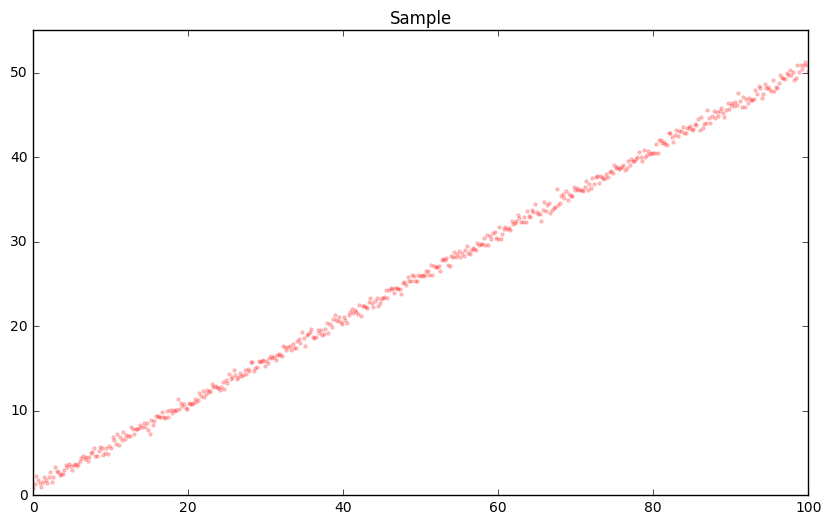

In [56]:
x = np.linspace(0, 100, 500)
eps = st.norm.rvs(loc=0, scale=0.2 ** 0.5, size=500)
y = np.array([0.5 * x[i] + 1 + eps[i] for i in range(0, 500)])

plt.figure(figsize=(10, 6)) 
plt.scatter(x, y, alpha=0.2, s=5, color='red')  
plt.title('Sample')  
plt.xlim([0,100])
plt.ylim([0,55])
plt.show()

In [57]:
def MSE(arg):
    return ((arg[0] * x + arg[1] - y) ** 2).mean()

def MAE(arg):
    return np.abs(arg[0] * x + arg[1] - y).mean()

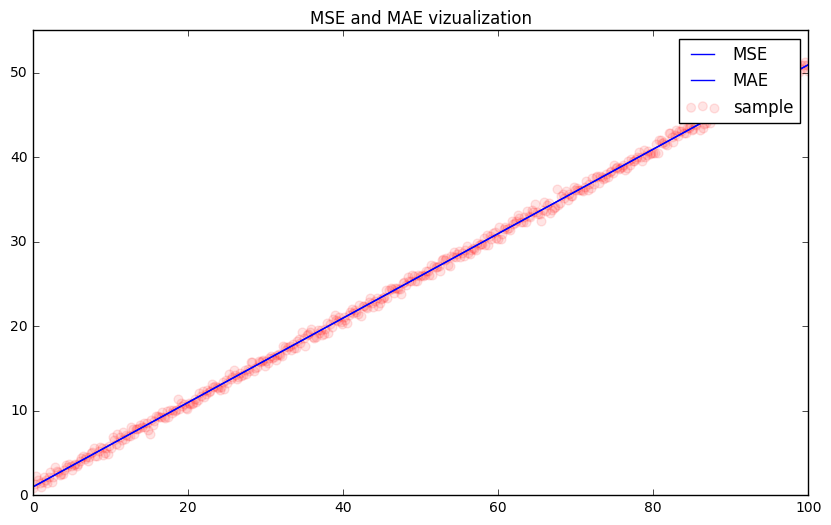

In [58]:
mse = minimize(MSE, [1, 1])
mae = minimize(MAE, [1, 1])

plt.figure(figsize=(10, 6)) 
plt.scatter(x, y, alpha=0.1, s=40, color='red', label='sample')  
plt.plot(x,mse.x[0] * x + mse.x[1],color='blue', label='MSE')
plt.plot(x,mae.x[0] * x + mae.x[1],color='blue', label='MAE')
plt.legend()
plt.title("MSE and MAE vizualization")
plt.xlim([0,100])
plt.ylim([0,55])
plt.show()

In [59]:
x = np.append(x, np.linspace(0, 100, 75))
eps = st.norm.rvs(loc=0, scale=0.2 ** 0.5, size=75)
y = np.append(y, -1 + eps)

Расширим выборку, добавив 75 точек с зависимостью $y = -1 + \varepsilon$

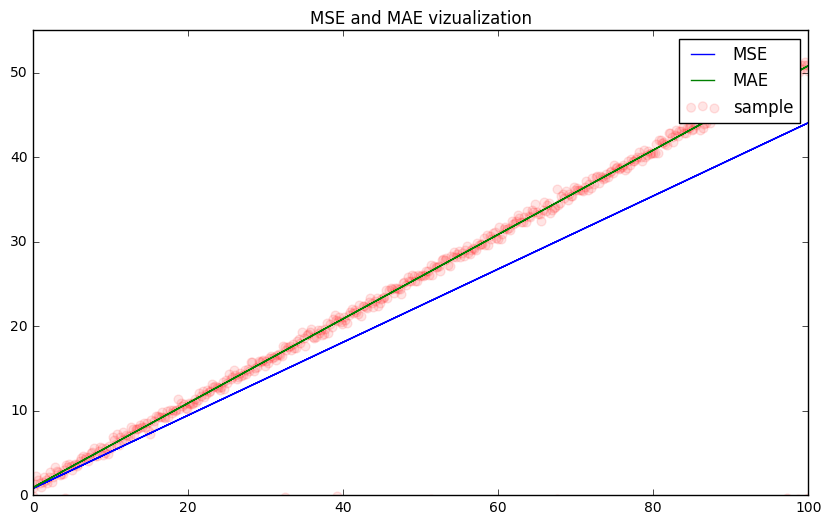

In [60]:
mse = minimize(MSE, [1, 1])
mae = minimize(MAE, [1, 1])

plt.figure(figsize=(10, 6)) 
plt.scatter(x, y, alpha=0.1, s=40, color='red', label='sample')  
plt.plot(x,mse.x[0] * x + mse.x[1],color='blue', label='MSE')
plt.plot(x,mae.x[0] * x + mae.x[1],color='green', label='MAE')
plt.legend()
plt.title("MSE and MAE vizualization")
plt.xlim([0,100])
plt.ylim([0,55])
plt.show()

По полученным графикам видно, что метрика MAE более устойчива к выбросам.